In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import glob
import os

In [16]:
O0 = 'C - O0'
O3 = 'C - O3'
ASM = 'ASM - SSE'
algo = 'Algoritmo'
tam = 'Tamaño'
ticks = 'Ticks'

In [26]:
dfO0 = pd.read_csv('rgb2yuv-control.csv')
dfO3 = pd.read_csv('rgb2yuv-O3.csv')
dfO3[algo] = dfO3[algo].map({0: 2})
dfRGB = pd.concat([dfO0, dfO3], ignore_index=True)
dfRGB[algo] = dfRGB[algo].map({1: ASM, 0: O0, 2: O3})
dfRGB = dfRGB.groupby([algo, tam]).min().reset_index()

dfO0 = pd.read_csv('yuv2rgb-control.csv')
dfO3 = pd.read_csv('yuv2rgb-O3.csv')
dfO3[algo] = dfO3[algo].map({0: 2})
dfYUV = pd.concat([dfO0, dfO3], ignore_index=True)
dfYUV[algo] = dfYUV[algo].map({1: ASM, 0: O0, 2: O3})
dfYUV = dfYUV.groupby([algo, tam]).min().reset_index()

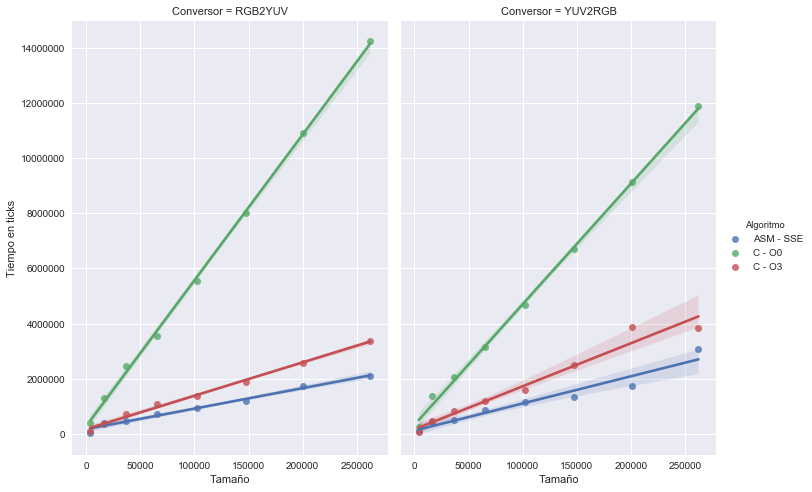

In [28]:
dfRGBConv = dfRGB.copy()
dfRGBConv.insert(0,"Conversor","RGB2YUV")
dfYUVConv = dfYUV.copy()
dfYUVConv.insert(0,"Conversor","YUV2RGB")

df = pd.concat([dfRGBConv, dfYUVConv], ignore_index=True)

g = sns.lmplot(x=tam, y=ticks, data=df, hue=algo, col='Conversor', truncate=True, size=7, aspect=0.7)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [30]:
dfO0 = pd.read_csv('fourCombine-control.csv')
dfO3 = pd.read_csv('fourCombine-O3.csv')
dfO3[algo] = dfO3[algo].map({0: 2})

dfFourCombine = pd.concat([dfO0, dfO3], ignore_index=True)
dfFourCombine[algo] = dfFourCombine[algo].map({1: ASM, 0: O0, 2: O3})
dfFourCombine = dfFourCombine.groupby([algo, tam]).min().reset_index()

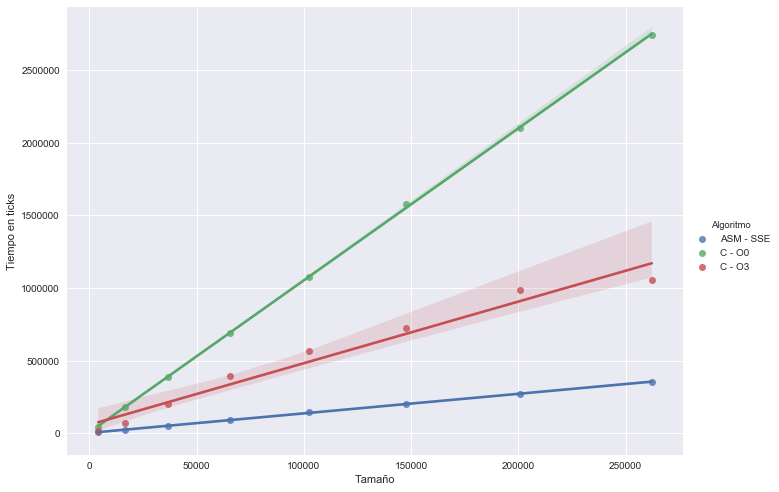

In [31]:
g = sns.lmplot(x=tam, y=ticks, data=dfFourCombine, hue=algo, truncate=True, size=7, aspect=1.4)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [33]:
dfO0 = pd.read_csv('linearZoom-control.csv')
dfO3 = pd.read_csv('linearZoom-O3.csv')
dfO3[algo] = dfO3[algo].map({0: 2})
dfZoom = pd.concat([dfO0, dfO3], ignore_index=True)
dfZoom[algo] = dfZoom[algo].map({1: ASM, 0: O0, 2: O3})

dfZoom = dfZoom.groupby([algo, tam]).min().reset_index()

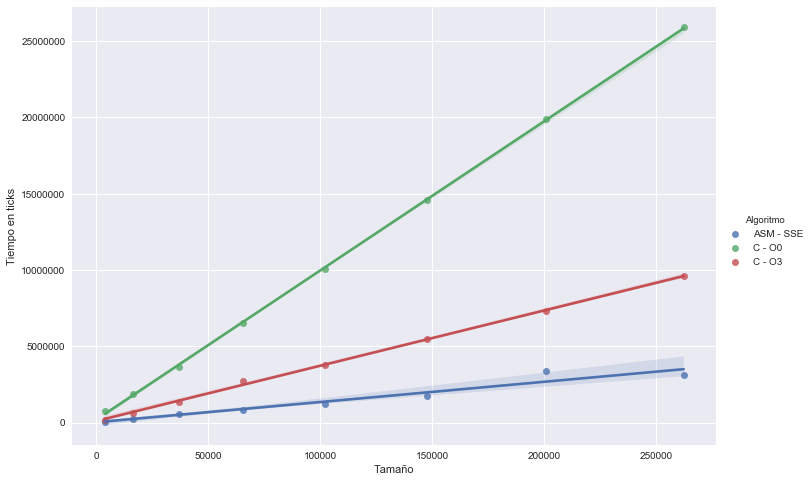

In [34]:
g = sns.lmplot(x=tam, y=ticks, data=dfZoom, hue=algo, truncate=True, size=7, aspect=1.4)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [35]:
dfO0 = pd.read_csv('maxCloser-control.csv')
dfO3 = pd.read_csv('maxCloser-O3.csv')
dfO3[algo] = dfO3[algo].map({0: 2})
dfMaxCloser = pd.concat([dfO0, dfO3], ignore_index=True)
dfMaxCloser[algo] = dfMaxCloser[algo].map({1: ASM, 0: O0, 2: O3})
dfMaxCloser = dfMaxCloser.groupby([algo, tam]).min().reset_index()

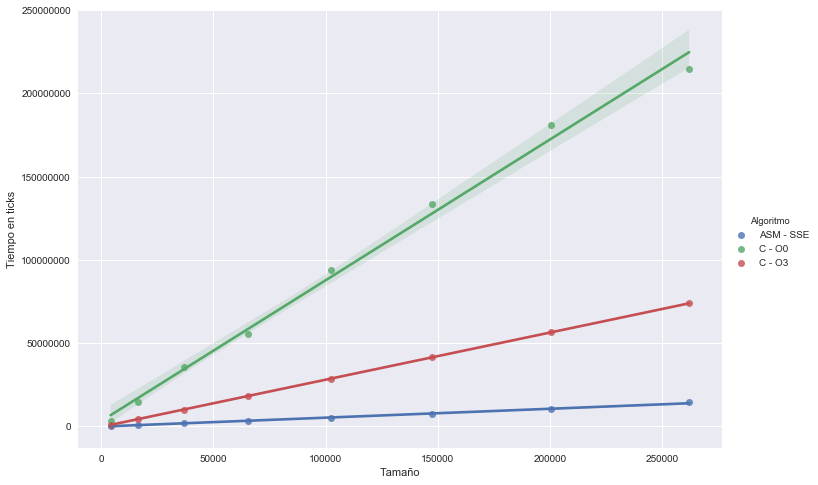

In [37]:
g = sns.lmplot(x=tam, y=ticks, data=dfMaxCloser, hue=algo, truncate=True, size=7, aspect=1.4)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

# Experimentos

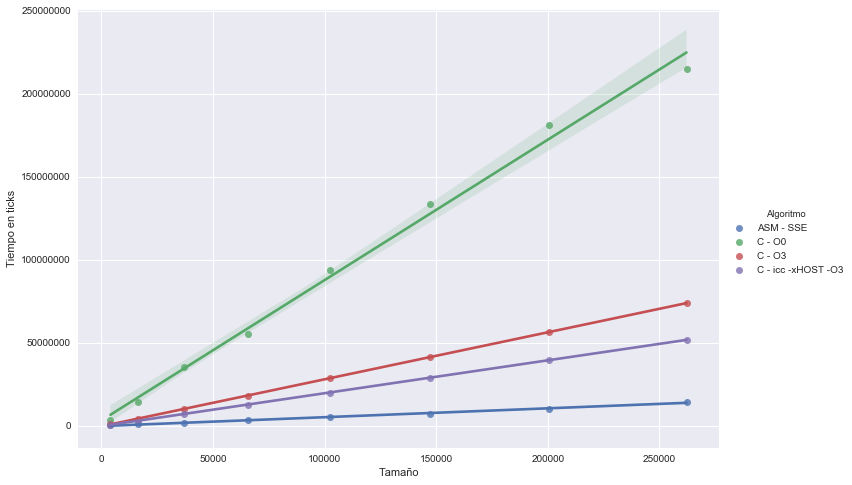

In [38]:
dfIntel = pd.read_csv('maxCloser-intel.csv')
dfIntel[algo] = dfIntel[algo].map({0: 'C - icc -xHOST -O3'})

df = pd.concat([dfMaxCloser, dfIntel], ignore_index=True)
df = df.groupby([algo, tam]).min().reset_index()

g = sns.lmplot(x=tam, y=ticks, data=df, hue=algo, truncate=True, size=7, aspect=1.4)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

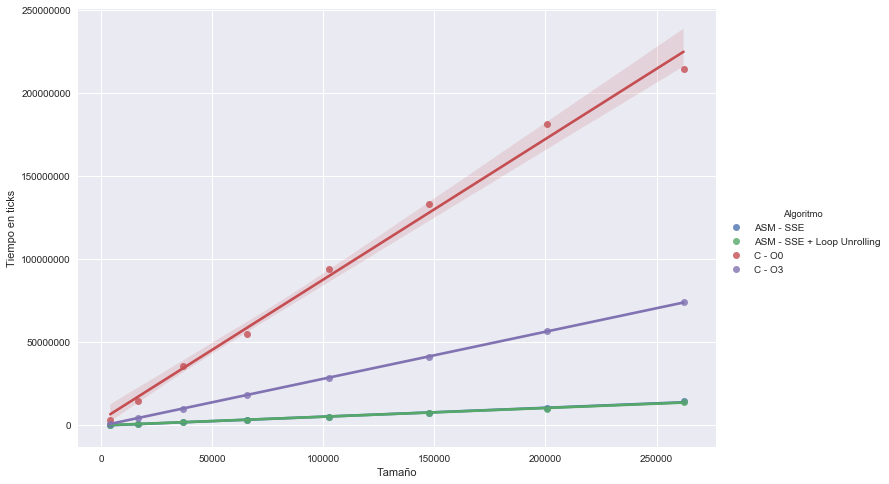

In [39]:
dfUnroll = pd.read_csv('maxCloser-unroll.csv')
dfUnroll[algo] = dfUnroll[algo].map({1: 'ASM - SSE + Loop Unrolling'})

df = pd.concat([dfMaxCloser, dfUnroll], ignore_index=True)
df = df.groupby([algo, tam]).min().reset_index()

sns.lmplot(x=tam, y=ticks, data=df, hue=algo, truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

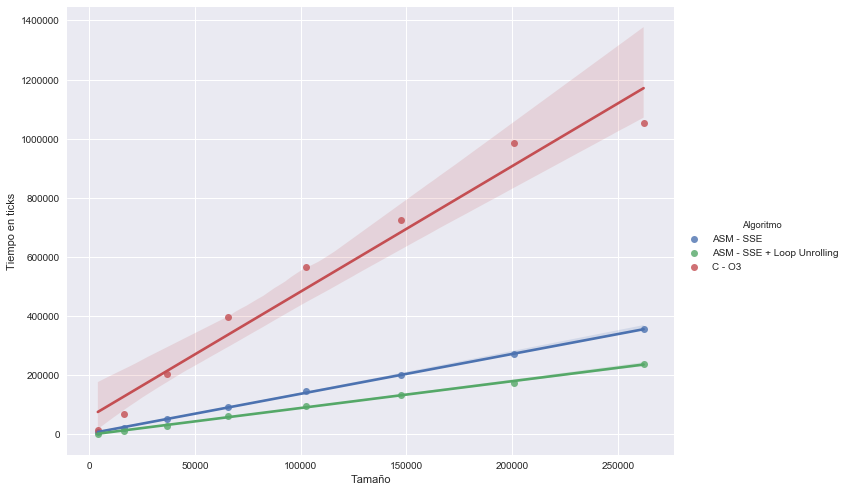

In [41]:
dfUnroll = pd.read_csv('fourCombine-unroll.csv')
dfUnroll[algo] = dfUnroll[algo].map({1: 'ASM - SSE + Loop Unrolling'})

df = pd.concat([dfFourCombine, dfUnroll], ignore_index=True)
df = df.groupby([algo, tam]).min().reset_index()
df = df[df.Algoritmo != O0]

sns.lmplot(x=tam, y=ticks, data=df, hue=algo, truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

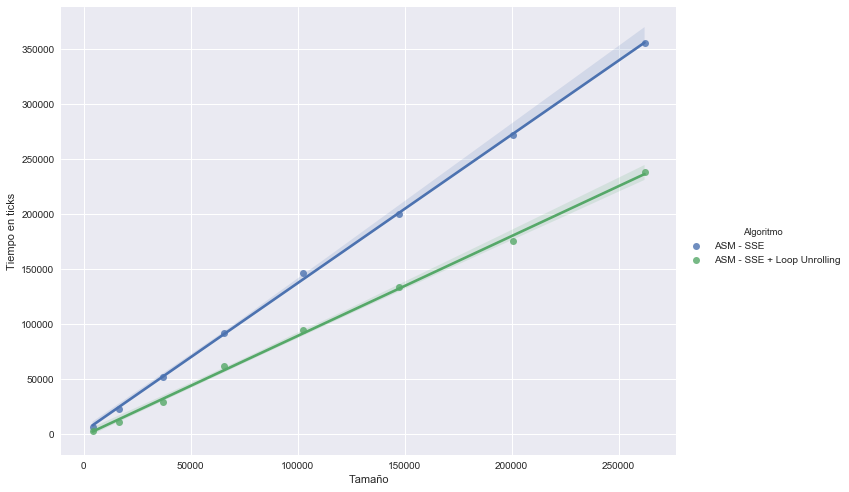

In [42]:
dfUnroll = pd.read_csv('fourCombine-unroll.csv')
dfUnroll[algo] = dfUnroll[algo].map({1: 'ASM - SSE + Loop Unrolling'})

df = pd.concat([dfFourCombine, dfUnroll], ignore_index=True)
df = df.groupby([algo, tam]).min().reset_index()
df = df[(df.Algoritmo != O0) & (df.Algoritmo != O3)]

sns.lmplot(x=tam, y=ticks, data=df, hue=algo, truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

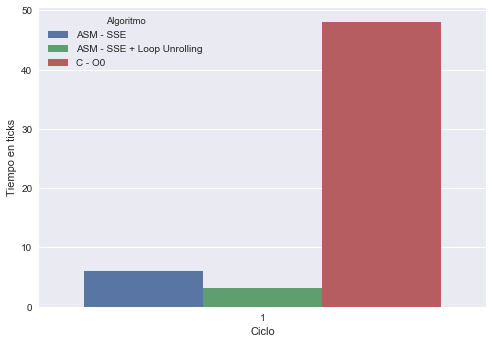

In [47]:
df1C = pd.read_csv('fourCombine-1ciclo.csv')

df1CU = pd.read_csv('fourCombine-1ciclo-unroll.csv')
df1CU[algo] = df1CU[algo].map({0: 0, 1: 2})
df = pd.concat([df1C, df1CU], ignore_index=True)
df[algo] = df[algo].map({0: O0, 1: ASM, 2: 'ASM - SSE + Loop Unrolling'}) # acá decía "C - O1", no es O0?
df = df.groupby([algo, 'Ciclo']).min().reset_index() # acá se usaba promedio, por qué?
sns.barplot(x='Ciclo', y='Ticks', data=df, hue='Algoritmo') # por qué comparamos O0/1 en vez de O3?
plt.ylabel('Tiempo en ticks')
plt.show()